# Notes on Computational Finance
> (1) compute the value of an option, (2) define hedging strategies that replicate this option, and (3) calibrate a parametric model with observed option prices. 

- toc: true 
- badges: true
- comments: true
- categories: [derivatives, valuation, monte carlo, stochastic calculus]


Consider a market containing two primary assets: a risk-free bond with price $B_t=e^{rt}$, a stock $S_t$
of geometric Brownian motion type $S(t)$ = $S(0) exp(\mu t + \sigma W(t))$, with parameters $\mu \in \mathbb{R}, \sigma > 0 $ and standard Brownian motion $W$.

A derivative or option is an asset whose payoff depends on the underlying. The payoff $X$ at time $T$ may be a function $f(S(T))$ of the underlying at time $T$ as e.g. $X = (S(T)-K)^{+}$ for a simple European call or it could be a more complex function of the whole past of $S$. In complete markets such options can be replicated perfectly. This means that there exists a self-financing portfolio $\phi = (\phi_0,\phi_1)$ whose value at time $T$ equals $V_\phi(T) = X$. Absence of arbitrage implies that $V_\phi(t)$ is the only reasonable option price of the option at time $t$. It can be computed as conditional expectation


$$V_\phi(t) = B(t)\mathbb{E}^\mathbb{Q}\big[X/B(T) \big| \mathcal{F}_t\big]$$


of the discounted payoff under the unique equivalent martingale measure $\mathbb{Q}$, i.e. the unique
probability measure $\mathbb{Q} \sim \mathbb{P}$ such that $S/B$ is a $\mathbb{Q}$-martingale.

American options are specified by an entire exercise process $X = (X(t))_{t\in[0,T]}$ as e.g. $X(t) = (K-S(t))^{+}$ for an American put. In the complete case, the only reasonable price is the B-fold of the Snell envelope of $X/B$ relative to $\mathbb{Q}$. The $\mathbb{Q}$-Snell envelope is the smallest $\mathbb{Q}$-supermartingale dominating $X/B$. Again, $\mathbb{Q}$ denotes the unique equivalent martingale measure from above. One can write this fair price also as


$$V(t) =  \sup_{\tau} \mathbb{E}^\mathbb{Q}\big[X(\tau)/B(\tau) \big| \mathcal{F}_t\big]$$


where the supremum extends over all stopping times stopping between $t$ and $T$. One such stopping time is the first time $t$ such that $V (t) = X(t)$, i.e. the market price of the option equals the exercise price.



- A Martingale is a sequence of random variables (i.e., a stochastic process) for which, at a particular time in the realized sequence, the expectation of the next value in the sequence is equal to the present observed value even given knowledge of all prior observed values. Supermartingale: $\mathbb{E}$ equal or less than current value.
- The Snell envelope is the smallest supermartingale dominating a stochastic process. 
- Supremum: the smallest quantity that is greater than or equal to each of a given set or subset of quantities.
- $\mathcal{F}_t$ is the sigma-field at time $t$, i.e. all the available information at time $t $

## Binomial Trees 



In the Cox-Ross-Rubinstein model (CRR) we consider equidistant times $0 = t_0,t_1,...,t_M = T$ with $t_i = i\Delta t$ and hence $\Delta t = T/M.$ The bond moves according to $B(t_i) = e^{rt_i}$ .
The stock goes up by a factor $u$ resp. down by a factor $d$ in each period, i.e.,

$$
 S(t_i) = 
  \begin{cases}
   S(t_{i-1})u&\text{with probability } p \\
   S(t_{i-1})d&\text{with probability } p-1
  \end{cases}
$$


, where $d < e^{r\Delta t} < u$. More precisely, $p$ and $1-p$ denote the conditional probabilities of going up and down, repectively, given the past. Option prices in a properly chosen sequence of CRR models converge to the corresponding Black-Scholes notions if the number of time step tends to infinity.

For option pricing real-world transition probabilities do not matter. Instead we need to consider martingale probabilities, i.e. probabilities such that

$$\mathbb{E}^\mathbb{Q}\big[S(t_i)/B(t_i)\big| \mathcal{F}_{t_{i-1}}\big] = S(t_{i-1})/B(t_{i-1})$$ .


If we denote the $Q$-transition probabilities by $q$ and $1-q$, respectively, the left-hand side equals
$q \frac{S(t_{i-1})u}{B(t_{i-1})e^{r\Delta t}} + (1-q) \frac{ S(t_{i-1})d}{B(t_{i-1})e^{r\Delta t}} $ which equals the right-hand side iff

$$ \frac{qu+(1-q)d}{e^{r\Delta t}} = 1 $$

 or

$$ q = \frac{e^{r\Delta t}-d}{u-d}$$



As previously mentioned a properly parameterized CRR model approximates BS as $M$ gets large. If we match the first two moments of the CRR and BS model we obtain

$$\begin{align}
u = \beta + \sqrt{\beta^2 - 1 }\\
d = \beta - \sqrt{\beta^2 - 1 }\\
q = \frac{\exp(r\Delta t ) - d}{u-d}\\
\beta = \frac{1}{2}( \exp{(-r \Delta t )} + \exp{((r +\sigma^2) \Delta t)}) \\
\end{align}$$

### European Options 
Consider a European option with payoff $g(S(T))$ for some function $g$ as e.g. $g(x) = (x-K)^{+}$ (call) or $g(x) = (K-x)^{+}$ (put). We denote the fair price of the option at time $t_i$ by $V(S(t_i), t_i)$. The $Q$-martingale property for discounted option prices reads as


$$\mathbb{E}^\mathbb{Q}\big[V (S(t_i), t_i)/B(t_i)\big| \mathcal{F}_{t_{i-1}}\big] = V (S(t_{i-1}), t_{i-1})/B(t_{i-1})$$

or 

$$q \frac{ V(S(t_{i-1})u,t_i)}{B(t_{i-1})e^{r\Delta t}} + (1-q)\frac{ V(S(t_{i-1})d,t_i)}{B(t_{i-1})e^{r\Delta t}}  = \frac{ V(S(t_{i-1}),t_i)}{B(t_{i-1})}$$

or

$$V (S(t_{i-1}), t_{i-1}) = e^{-r\Delta t} (qV(S(t_{i-1})u, t_i) + (1-q)V(S(t_{i-1})d, t_i))$$

We can compute option prices starting from $V (S(T ), T ) = g(S(T ))$ and moving backwards in time.

Since the model is complete, the payoff $g(S(T))$ can be replicated perfectly by a self-
financing portfolio $\phi = (\phi_0, \phi_1)$. Its value equals $\phi_0(t_i)B(t_i) + \phi_1(t_i)S(t_i) = V (S(t_i), t_i)$.

Due to self-financeability

$$\phi_0(t_{i-1})B(t_{i-1}) + \phi_1(t_{i-1})S(t_{i-1}) = \phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1})$$

leads to 

$$\phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1}) = V (S(t_{i-1}), t_{i-1})$$


$$\phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1}u) = V (S(t_{i-1}u), t_{i-1})$$


$$\phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1}d) = V (S(t_{i-1}d), t_{i-1})$$

Hence,

$$\phi_1(t_i) = \frac{V (S(t_{i-1})u, t_i) - V (S(t_{i-1})d, t_i)}{ S(t_{i-1})(u-d)}$$

$$\phi_0(t_i) = \frac{V (S(t_{i-1}),t_{i-1})- \phi_1(t_i)S(t_{i-1})}{B(t_{i-1})}$$

### American Options 
American options have exercise process $g(S(t_i))$ at time $t_i$.

$$V(S(t_{i-1}), t_{i-1}) = \max{ \{g(S(t_{i-1})),\mathbb{E}^\mathbb{Q}\big[V (S(t_i), t_i)/B(t_i)\big| \mathcal{F}_{t_{i-1}}\big]\}}$$

This leads to 

$$V (S(t_{i-1}), t_{i-1}) = \max{ \{g(S(t_{i-1})),e^{-r\Delta t} (qV(S(t_{i-1})u, t_i) + (1-q)V(S(t_{i-1})d, t_i))\}}$$

The first optimal stopping time is

$$\tau_f = \inf{\{t_i : V (S(t_i), t_i) = g(S(t_i))\}}$$

and the last optimal stopping time is

$$\tau_s = \inf{ \{t_i : i = M \text{  or  } g(S(t_i)) > e^{-r\Delta t} (qV (S(t_i)u, t_{i+1}) + (1-q)V (S(t_i)d, t_{i+1}))\}}$$

In [7]:
import numpy as np

def crr_bs_approx(S_0,r,sigma,T,M,K,EU,Type):
    
    dt=T/M
    #Set u,d,q such that first and second moments match BS
    beta = 0.5*(np.exp(-r*dt)+np.exp((r+(sigma**2))*dt))
    u = beta + ((beta**2)-1)**0.5
    d = 1/u#beta - ((beta**2)-1)**0.5
    q = (np.exp(r*dt)-d)/(u-d)

    if Type == 'call':
        def g(St,K):
            return max(St - K, 0)
    elif Type == 'put':
        def g(St,K):
            return max(K - St, 0)
    else:
        raise Exception("Specify valid Type ('put'/'call')") 

    g = np.vectorize(g ,otypes=[np.float])        

    S = np.zeros((M+1,M+1))
    S[0,0] = S_0
    V = np.zeros((M+1,M+1))
    for i in range(1,M+1):
        for j in range(i+1):
            S[j,i] = S_0*(u**j)*(d**(i-j))

    V[:,-1] = g(S[:,-1],K)

    if EU == 1:
        for i in range(M-1,-1,-1):
            for j in range(i+1):
                V[j,i] = np.exp(-r*dt)*( q*V[j+1,i+1] + (1-q)*V[j,i+1])
    elif EU == 0:
        for i in range(M-1,-1,-1):
            for j in range(i+1):
                V[j,i] = max(g(S[j,i],K) ,np.exp(-r*dt)*( q*V[j+1,i+1] + (1-q)*V[j,i+1]))
    else:
        raise Exception("Specify valid EU state (0/1)") 
    
    
    return V[0,0]



sigma=0.3
r=0.03
S_0=100
T=1
M=2000
K=100
EU=1
Type = 'call'

V = crr_bs_approx(S_0,r,sigma,T,M,K,EU,Type)
print(f"Fair value of option: {round(V,3)}")

Fair value of option: 13.282


To check whether the approximation is any good compute BS call and compare:

In [16]:
from scipy.stats import norm
import numpy as np

def eu_call_bs(S_t,r,sigma,T,K,t):
    d_1 = (np.log(S_t/K)+(r+sigma**2/2)*(T-t))/(sigma*(T-t)**0.5)
    d_2 = d_1 - sigma*(T-t)**0.5
    phi_1 = norm.cdf(d_1)
    cdf_d2 = norm.cdf(d_2)
    c = S_t * phi_1 - K*np.exp(-r*(T-t)) *cdf_d2
    phi_0 = -K*np.exp(-r*T)*cdf_d2
    return c, phi_0, phi_1

sigma=0.3
r=0.03
S_t=100
T=1
K=100 
t = 0

c, phi_0, phi_1 = eu_call_bs(S_t,r,sigma,T,K,t)
print(f"The fair value of the option is {round(c,3)}, the hedging position in the the stock is {round(phi_1,3)}, \
the hedging position in the the bond is {round(phi_0,3)}.")    

The fair value of the option is 13.283, the hedging position in the the stock is 0.599, the hedging position in the the bond is -46.587.


## Monte Carlo
Once we are considering very complicated payoff structures many numerical methods relying on e.g. solving PDE’s or using integral transforms are not available anymore. In this case we can employ Monte Carlo methods, basically simulating many possible futures and taking the sample moments as an approximation of the real world population moments. 
For this we need a random number generator that can sample from the appropriate probability distribution. The needed law might not be implemented in the software package so we may need to implement a random number generator that takes only uniformly distributed random numbers as input. This can be done via 
- Inversion
- Acceptance/rejection method 

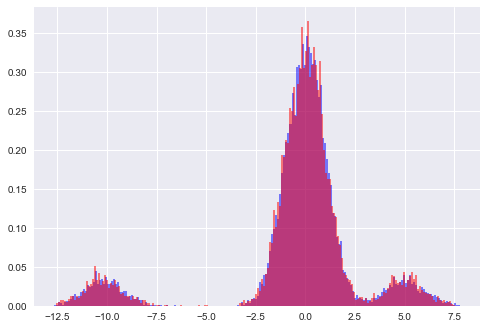

In [69]:
import numpy as np
import scipy.interpolate as interpolate
from matplotlib import pyplot as plt 

def inverse_transform_sampling(data, n_bins=100, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

st_normal = np.random.normal(0,1,10000)
mm_normal = np.append(st_normal, (np.random.normal(5,1,1000), np.random.normal(-10,1,1000)))
c = inverse_transform_sampling(mm_normal,n_bins=100, n_samples=10000)
plt.hist(mm_normal, alpha=0.5, bins=200, normed=True, color='b')
plt.hist(c, alpha=0.5, bins=200, normed=True, color='r')
plt.show()

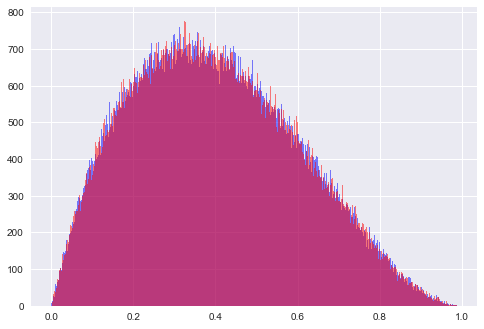

In [11]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.special import beta as beta 

# Density of the Beta distribution
def  Beta_density(x, alpha1, alpha2):
    return 1/beta(alpha1,alpha2) * (x)**(alpha1-1) * (1-x)**(alpha2-1) * (x>=0) * (x<=1)

def Sample_Beta_AR(alpha1, alpha2, N):
    
    # Mode of the beta density 
    x_max = (alpha1-1) / (alpha1+alpha2-2) 
    
    
    # Constant C for the acceptance/rejection method. C is the optimal height of the rectangle in which
    # we through our imaginary darts.
    C = Beta_density(x_max, alpha1, alpha2)

    # Generate one sample by the acceptance/rejection method
    def SingleSample():
    
        success = False
        while not success:
            U = np.random.rand(2,1)
            success = ( C*U[1] <= Beta_density(U[0], alpha1, alpha2) )
        return U[0]
        
    
    X = np.zeros(N)
    for n in range(N):
        X[n] = SingleSample()

    return X


alpha1 = 2
alpha2 = 3
N = 200000

b_ar = Sample_Beta_AR (alpha1, alpha2, N)
plt.hist(b_ar,alpha=0.5, bins=500, normed=False, color='b')

# Compare with numpy's version of beta distribution
b = np.random.beta(alpha1, alpha2, N)
plt.hist(b,alpha=0.5, bins=500, normed=False, color='r')
plt.show()


In [18]:
import numpy as np

def mc_eu(S_0,K,r,sigma,T,N,g):
    def f(x):
        return np.exp(-r*T)*g(S_0*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
                              
    X = np.random.normal(0,1,N)
    Y = f(X)
    v_0 = np.mean(Y)
    epsilon = 1.96 * np.sqrt(np.var(Y)/N)
    return v_0, epsilon
                  
sigma=0.3
r=0.03
S_0=100
T=1
N=10000
K=100
g = lambda S, K: np.maximum((S - K),0)

V,e = mc_eu(S_0,K,r,sigma,T,N,g)
print(f"Fair value of option: {round(V,3)},\n95% confidence interval: [ {round(V - e,3)} , {round(V+e,3)} ]")

Fair value of option: 13.462,
95% confidence interval: [ 13.036 , 13.889 ]


### Variance reduction

The Monte Carlo estimator converges at the rate $\frac{1}{\sqrt{ N }}$ since its standard deviation is $\sigma(\hat{V_N}) = \frac{\sigma(f(X))}{\sqrt{N}}$. Since we don't have unlimited compute power this rate of convergence might be to slow for our purposes. We may can do better by trying to reduce $\sigma(f(X))$ through some tricks, e.g., by means of antithetic variables or control variates. Another problem arises if there are outcomes with very low probability that have a large effect on the option value, i.e., Black Swans. In this case, we may not get any samples from the part of the distribution that matter most and our estimate will be way off. To correct for that use importance sampling. This can be useful e.g. in pricing deep out of the money puts:  

In [6]:
from scipy.stats import norm
import numpy as np

# Importance Sampling
def mc_eu_is(S_0, K, r, sigma, T, N, g, mu):
    def f(x):
        return np.exp(-r*T-x*mu+0.5*mu**2)*g(S_0*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
                              
    X = np.random.normal(mu,1,N)
    Y = f(X)
    v_0 = np.mean(Y)
    
    # Compute radius of 95% confidence interval.
    epsilon = 1.96 * np.sqrt(np.var(Y)/N)
    return v_0, epsilon

#Antithetic Variables
def mc_eu_av (S_0, K, r, sigma, T, N, g):
    def f(x):
        return np.exp(-r*T) * g(S_0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*x), K)
    
    X = np.random.normal(0,1,N)
    
    # Compute Monte-Carlo estimator using antithetic variables taking advantage of the symmetry of the gaussian.
    # Antithetic variables only increase the bang for the buck if random vars are negatively correlated.
    # Since X2 = -X1 this is clearly the case here. 
    Y = (f(X)+f(-X)) / 2
    v_0 = np.mean(Y)
    
    # Compute radius of 95% confidence interval.
    epsilon = 1.96 * np.sqrt(np.var(Y)/N)
    return v_0, epsilon


#Closed Form BS
def eu_put_bs(S_t, r, sigma, T, K, t):
    d_1 = (np.log(S_t/K)+(r+sigma**2/2)*(T-t))/(sigma*(T-t)**0.5)
    d_2 = d_1 - sigma*(T-t)**0.5

    p =  K*np.exp(-r*(T-t)) *norm.cdf(-d_2) -  S_t *norm.cdf(-d_1)
    
    return p




sigma=0.3
r=0.03
S_0=S_t=200
T=1
N=10000
K=100
g = lambda S, K: np.maximum((K-S),0)
t = 0
mu = ( np.log(K/S_0) - (r-1/2*sigma**2)*T ) / ( sigma*np.sqrt(T) )

V,e = mc_eu_is(S_0,K,r,sigma,T,N,g,mu)
print(f"Fair value of OOM put with importance sampling: {round(V,3)}, \
95% confidence interval: [ {round(V - e,3)} , {round(V+e,3)} ]")

V,e = mc_eu_av(S_0,K,r,sigma,T,N,g)
print(f"Fair value of OOM put with antithetic variables: {round(V,3)}, \
95% confidence interval: [ {round(V - e,3)} , {round(V+e,3)} ]")

V,e = mc_eu(S_0,K,r,sigma,T,N,g)
print(f"Fair value of OOM put standard MC : {round(V,3)}, 95% confidence \
interval: [ {round(V - e,3)} , {round(V+e,3)} ]")


V = eu_put_bs(S_t,r,sigma,T,K,t)
print(f"Fair value of OOM put BS: {round(V,3)}")


Fair value of OOM put with importance sampling: 0.109, 95% confidence interval: [ 0.106 , 0.111 ]
Fair value of OOM put with antithetic variables: 0.109, 95% confidence interval: [ 0.09 , 0.127 ]
Fair value of OOM put standard MC : 0.126, 95% confidence interval: [ 0.098 , 0.155 ]
Fair value of OOM put BS: 0.109


As can be seen above, the importance sampling technique estimates a much tighter confidence interval for the OOM put. The antithetic variables approach reduces the variance a bit. 

### Using control variables to reduce the variance of MC-estimators

Let's price a self-quanto call in the Black-Scholes model via the Monte-Carlo approach while reducing the variance with a European call as control variable. 



In [15]:
from scipy.stats import norm
import numpy as np

def eu_call_bs(S_t,r,sigma,T,K,t):
    d_1 = (np.log(S_t/K)+(r+sigma**2/2)*(T-t))/(sigma*(T-t)**0.5)
    d_2 = d_1 - sigma*(T-t)**0.5
    phi_1 = norm.cdf(d_1)
    cdf_d2 = norm.cdf(d_2)
    c = S_t * phi_1 - K*np.exp(-r*(T-t)) *cdf_d2
    phi_0 = -K*np.exp(-r*T)*cdf_d2

    return c, phi_0, phi_1


# function for computing the price of a self quanto call in the BS-model using Monte-Carlo with control variate (ST-K)^+
def EuOption_BS_MC_CV (S0, r, sigma, T, K, M):
    
    # Determine beta = Cov(ST*(ST-K)^+,(ST-K)^+) / Var((ST-K)^+) by Monte Carlo simulation.
    X = np.random.normal(0,1,M)
    ST = S0*np.exp( (r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X )
    VT = ST*np.maximum((ST-K),0)
    CT = np.maximum((ST-K),0)
    C0,_,_ = eu_call_bs(S0,r,sigma,T,K,t) #initial price of the call used as control variate,also used here to 
    # help determine the empirical covariance instead of Covar = np.mean( (CT-np.mean(CT)) * (VT-np.mean(VT)) )
    Covar = np.mean( (CT-C0*np.exp(r*T)) * (VT-np.mean(VT)) )
    beta = Covar / np.var(CT)
    
    # Compute Monte Carlo estimator using the initial Call option price as control variate.
    X = np.random.normal(0,1,M)
    ST_hat = S0*np.exp( (r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X )
    Y = ST_hat*np.maximum((ST_hat-K),0)-beta*np.maximum((ST_hat-K),0)
    V0 = np.exp(-r*T)*np.mean(Y) + beta*C0
    
    # Compute radius of 95% confidence interval
    epsilon = 1.96 * np.sqrt(np.var(Y)/M)
    return V0, epsilon, beta



def EuOption_BS_MC (S0, r, sigma, T, K, M):
    

    X = np.random.normal(0,1,M)
    ST_hat = S0*np.exp( (r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X )
    Y = ST_hat*np.maximum((ST_hat-K),0)
    V0 = np.exp(-r*T)*np.mean(Y) 
    
    # Compute radius of 95% confidence interval
    epsilon = 1.96 * np.sqrt(np.var(Y)/M)
    return V0, epsilon


sigma=0.3
r=0.03
S0=100
T=1
K=100 
t = 0
M=100000

V0, epsilon, beta = EuOption_BS_MC_CV (S0, r, sigma, T, K, M)
print(f"Control Variate \n  Option Price: {V0} \n  Epsilon: {epsilon} \n  Beta: {beta}")

print("\n")

V0, epsilon= EuOption_BS_MC (S0, r, sigma, T, K, M)
print(f"Standard MC \n  Option Price: {V0} \n  Epsilon: {epsilon}")


Control Variate 
  Option Price: 1999.7236047923905 
  Epsilon: 5.604362549148449 
  Beta: 179.43568394156813


Standard MC 
  Option Price: 2015.4528087679719 
  Epsilon: 25.915084371493748


### Finite difference method
In addition to the fair value of the option we need to know how to hedge it. Hedging strategies often involve the derivative of the option with respect to variables such as the stock price. The finite difference approach gives us an approximation of the derivative. This works by simply nudging the variable $+h/2$ and $-h/2$ and observing how the function changes relative to $h$. More formally, for a sufficiently smooth function $z$ we have the Taylor expansion

$$ z( \theta + h/2) = z(\theta) + z' (\theta) h/2 + z'' (\theta) h^2/8  + z''' (\theta) h^3/48 + O(h^4)$$

and 

$$ z( \theta - h/2) = z(\theta) - z' (\theta) h/2 + z'' (\theta) h^2/8  - z''' (\theta) h^3/48 + O(h^4)$$

where $O(h^4)$ stands for an expression such that $O(h^4)/h^4$  is bounded in a neighbourhood of
$h = 0$.

This yields 

$$z'(\theta) = \frac{z(\theta+h/2)-z(\theta-h/2)}{h} + O(h^2)$$ 

$$ = \mathbb{E}\big[\frac{Z(\theta+h/2)-Z(\theta-h/2)}{h} \big] + O(h^2)$$ 

The quantities $\mathbb{E}\big[ Z(\theta + h/2)\big]$ and $\mathbb{E}\big[ Z(\theta - h/2)\big]$ can be computed by Monte Carlo simulation as usual. Choosing a small $h$ reduces the bias due to the $O(h^2)$ term.

In [95]:
import numpy as np

def mc_eu(S_0,K,r,sigma,T,N,g):
        
    x = np.random.normal(0,1,N)
    y = np.exp(-r*T)*g((S_0)*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
    a = np.exp(-r*T)*g((S_0+h/2)*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
    b = np.exp(-r*T)*g((S_0-h/2)*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
    d = (a-b)/h
   
    delta = np.mean(d)
    V_0 = np.mean(y)
    
    return V_0, delta
                  
sigma=0.3
r=0.03
S_0=100
T=1
N=10**7
K=100
g = lambda S, K: np.maximum((S - K),0)
h = 1

V_0, delta = mc_eu(S_0,K,r,sigma,T,N,g)
print(f"Option Value: {round(V_0,3)} \n   Hedging Position Stock {round(delta,3)} \n   Hedging\
 Position Bond {round((V_0-delta*S_0),3)}")

Option Value: 13.285 
   Hedging Position Stock 0.599 
   Hedging Position Bond -46.576


In [91]:
import numpy as np
from scipy.misc import derivative

def EuCallHedge_BS_MC_IP (St, r, sigma, g, T, t, N, K):
    
    X = np.random.normal(0,1,N)
    g_del = np.zeros(X.shape)
    
    # Compute derivative of g(St*exp( (r-0.5*sigma^2)*(T-t) + sigma*sqrt(T-t)*X)) w.r.t to St
    # This equeals g'(St*exp( (r-0.5*sigma^2)*(T-t) + sigma*sqrt(T-t)*X ))* exp( (r-0.5*sigma^2)*(T-t) +
    # sigma*sqrt(T-t)*X by chain rule)  
    
    for i in range(N):
        g_del[i] = derivative(g, St*np.exp( (r-0.5*sigma**2)*(T-t) + sigma*np.sqrt(T-t)*X[i]),args=(K,) )
    

    Y = g_del * np.exp( -0.5*sigma**2*(T-t) + sigma*np.sqrt(T-t)*X)
    delta = np.mean(Y)
    
    # Compute 95% confidence interval 
    epsilon = 1.96 * np.sqrt(np.var(Y)/N)
    c1=delta-epsilon
    c2=delta+epsilon
    return delta, c1, c2


sigma=0.3
r=0.03
S_t=100
t=0
T=1
N=10**5
K=100
g = lambda S, K: np.maximum((S - K),0)
delta, c1, c2 = EuCallHedge_BS_MC_IP (St, r, sigma, g, T, t, N, K)

print(f"Delta via Infinitesimal Perturbation \n   Delta: {delta} \n   95% Confidence Interval: [{c1},{c2}]")

Delta via Infinitesimal Perturbation 
   Delta: 0.5999187977035505 
   95% Confidence Interval: [0.5959336800017455,0.6039039154053555]


## Simulation of stochastic integrals
In some applications we need to simulate the whole path $(X (t))_{t\in[0,T ]}$ of a stochastic process rather than just its terminal value $X(T)$. This happens e.g. if we want to compute prices of path-dependent claims as e.g. lookback, barrier, or Asian options. But even if we are interested only in$ X (T )$, it may be necessary to simulate the past as well because we do not know the law of $ X(T)$ in closed form.
In this section we focus on diffusion-type processes, i.e., solution to stochastic differential equations of the form
$$dX (t) = a(X (t), t)dt + b(X (t), t)dW (t)$$

with some Wiener process $W$, some starting value $X(0)$, and given deterministic functions $a$, $b$. It is obviously impossible to simulate infinitely many numbers on a real computer. The goal is therefore to generate random paths of $X$ on some equidistant time grid $0 = t_0 < t_1 < ··· < t_m = T$ with $t_i = i\Delta t$ and $\Delta t = T/m$, i.e., 
$X(t_0),...,X(t_m)$.

### Euler method
If $a$ and $b$ are sufficiently smooth and the grid is sufficiently dense 
$$X(t_i) \approx X(t_{i-1})+ \int_{t_{i-1}}^{t_i} a(X(t_{i-1}),t_{i-1})dt + \int_{t_{i-1}}^{t_i} b(X(t_{i-1}),t_{i-1})dW(t)$$

$$= X(t_{i-1}) + a(X(t_{i-1}), t_{i-1})\Delta t + b(X(t_{i-1}), t_{i-1})\Delta W_i$$

with $W_i = W_{t_{i}} - W_{t_{i-1}}$
is a good approximation for 

$$X(t_i) = X(t_{i-1})+ \int_{t_{i-1}}^{t_i} a(X(t),t)dt + \int_{t_{i-1}}^{t_i} b(X(t),t)dW(t)$$

Let's simulate geometric Brownian motion where $a(X(t),t) = \mu * X(t) $ and $b(X(t),t) = \sigma * X(t) $ 

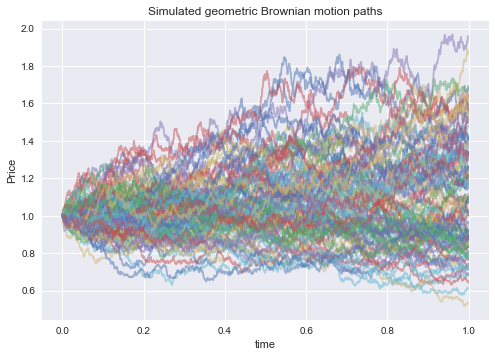

The mean stock price at time T is 1.1030173035417743


In [9]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn

def geom_brownian_motion(m,T,a,b,X_0):
    dt = T/m
    r = np.random.normal(0,1,m)
    dW = r * np.sqrt(dt)
    X = np.zeros(m)
    t = np.zeros(m)
    t[0] = 0

    X[0] = X_0
    for i in range(1,m):
        t[i] = t[i-1]+dt
        X[i] = X[i-1] + a(X[i-1],t[i-1])*dt + b(X[i-1],t[i-1])*dW[i]
    return X, t


m=1000
T=1
mu = 0.1
sigma = 0.3
a = lambda X, t: mu*X
b = lambda X, t:sigma*X
X_0 = 1  

# Let's simulate n alternative future histories.
n = 100
X = np.zeros((n,m))
for i in range(n):
    X[i],t = geom_brownian_motion(m,T,a,b,X_0)
    plt.plot(t,X[i],alpha=0.5)
    
plt.title("Simulated geometric Brownian motion paths")
plt.xlabel("time")
plt.ylabel("Price")
plt.show()

X_mean  = np.mean(X[:,-1])
print(f"The mean stock price at time T is {X_mean}")

And let us show by simulation that this is equivalent to $X(t) = X(0) \exp((\mu -\sigma^2/2)t + \sigma W (t))$ with $t = T$ .

In [14]:
X = np.zeros(n)
r = np.random.normal(0,1,m)

X = X_0 *np.exp((mu-sigma**2/2)*T + sigma*r*T**0.5)
X_mean  = np.mean(X)
print(f"The mean stock price at time T is {X_mean}")

The mean stock price at time T is 1.1003810409996253


### MC Heston model 

The Heston model extends the Black-Scholes model in that the variance of returns now is variable. To use MC methods we have to simulate the whole sample paths.  Let's first simulate paths using the Euler method and then use straight forward MC methods to prive the option. 

In [6]:
import numpy as np 

def SimPaths_Ito_Euler(X0 ,a ,b ,T ,m, N):
    Delta_t = T/(m-1)
    Delta_W = np.random.normal(0, np.sqrt(Delta_t),(N, m))
    
    X = np.zeros(Delta_W.shape)
    X[:,0] = X0 * np.ones(N)
    
    for i in range(m-1):
        X[:,i+1]=X[:,i]+a(X[:,i],i*Delta_t)*Delta_t+b(X[:,i],i*Delta_t)*Delta_W[:,i]
    return X
         

def Heston_EuOption_MC(S0, r, gamma, T, g, K):
    N, m = gamma.shape[0], gamma.shape[1]
    Delta_t = T/(m-1)
    
    
    X = np.random.normal(0,1,N)
    drift = np.dot((np.ones((N, m))*r - gamma * 0.5) , np.ones(m)) * Delta_t
    std = np.sqrt( np.dot(gamma , np.ones(m)) * Delta_t)
    
    ST = S0*np.exp(drift + std * X)
    
    V0 = np.exp(-r*T) * np.mean(g(ST,K))
    
    return V0

K = 100
N=100000
m=100
S0 = 100
r = 0.03
nu0 = 0.3**2
kappa = 0.3**2
Lambda = 2.5
sigma_tilde = 0.2
T = 1
g = lambda S, K: np.maximum((S - K),0)


# Function for the drift of the variance process in the heston model 
a = lambda x, t: kappa-Lambda*x

# Function for the standard deviation of the variance process in the heston model 
b = lambda x, t: np.sqrt(x)*sigma_tilde

gamma = SimPaths_Ito_Euler(nu0 ,a ,b ,T ,m, N)

V0 = Heston_EuOption_MC(S0, r, gamma, T, g, K)
print(f"Option Value: {V0}")


Option Value: 10.851623171194033


In [7]:
import numpy as np

def UpOutPut_BS_MC_Richardson (S0, r, sigma, T, K, B, M, m):
    
    # Time step on the fine grid.
    delta_t = T/(2*m)
    
    S_fine = S0 * np.ones(M)
    S_coarse = S0 * np.ones(M)
    no_barrier_hit_fine = np.ones(M)
    no_barrier_hit_coarse = np.ones(M)
    
    # Loop over points on coarse grid.
    for k in range(m):
        
        # Simulate two increments of Brownian motion on the fine grid.
        delta_W_1 = np.random.normal(0,np.sqrt(delta_t),M)
        delta_W_2 = np.random.normal(0,np.sqrt(delta_t),M)
        
        # 1st Euler step on fine grid.
        S_fine = S_fine + r*S_fine*delta_t + sigma*S_fine*delta_W_1
        no_barrier_hit_fine = no_barrier_hit_fine * (S_fine<B)
        
        # 2nd Euler step on fine grid.
        S_fine = S_fine + r*S_fine*delta_t + sigma*S_fine*delta_W_2
        no_barrier_hit_fine = no_barrier_hit_fine * (S_fine<B)
        
        # Euler step on coarse grid.
        S_coarse = S_coarse + r*S_coarse*2*delta_t + sigma*S_coarse*(delta_W_1+delta_W_2)
        no_barrier_hit_coarse = no_barrier_hit_coarse * (S_coarse<B)
    
    # Compute (discounted) payoffs for paths on fine and coarse grids.
    VT_fine = no_barrier_hit_fine *  (np.exp(-r*T)*np.maximum( K - S_fine , 0))
    VT_coarse = no_barrier_hit_coarse *  (np.exp(-r*T)*np.maximum( K - S_coarse , 0))
        
    # Compute Monte Carlo estimate.
    VT = 2*VT_fine - VT_coarse
    V0 = np.mean(VT)
    
    # Compute radius of 95% confidence interval 
    epsilon = 1.96 * np.sqrt(np.var(VT)/M)
    return V0, epsilon 




S0 = 100
r = 0.05
sigma = 0.2
T = 1
K = 100
B = 110
M = 100000
m = 250


V0, epsilon = UpOutPut_BS_MC_Richardson (S0, r, sigma, T, K, B, M, m)
print(f"Option Value: {V0} \n  Radius of 95% Confidence Interval: {epsilon}")




Option Value: 4.28812361180373 
  Radius of 95% Confidence Interval: 0.05227428329961295


# Ito calculus 

If we move from dicrete time to continuous time, we need a proper framework for working with continuous stochastic processes. We are working in a probability space ($\Omega$, $\mathcal{F}$ , $P$ ) consisting of the set $\Omega$ of possible outcomes, a $\sigma$-field $\mathcal{F}$ on $\Omega$ and a probability measure $P$ on $\mathcal{F}$. Standard calculus works for functions with finite variation, continuous stochastic functions, however, can have infinite variation, i.e., they can't be approximated by a smooth function no matter how local one gets. 
Many adapted stochastic proccesses can be decomposed into $X = X(0)+M+A$ with a martingale $M$ and a predictable process of finite variation $A$ according to Doop-Meyer. Our primary need from stochastic calculus is the stochastic intragal which represents financial gains. If $H$ is piecewise constant $H(t) = \sum_{i=1}^{n}{V_i\mathcal{1}_{[t_{i-1},t_i)}(t)}$
then the integral $$H \bullet X := \int H(t)dX(t)$$ is defined as

$$H \bullet X(t):= \int_{0}^{t} H(s)dX(s):= \sum_{i=1}^n V_{i}(X(t_i)-X(t_{i-1}))$$
If $H(t$) stands for the number of shares in the portfolio at time $t$, $d$ for the assets, and $X(t)$ denotes the stock price at time $t$, then simple bookkeeping yields that  $\int_0^t H(s)dX(s)$ stands for the financial 
gains of the portfolio from time 0 to $t$. 

This can also be written as 

$$dY (s) = H(s)dX(s)$$

The integration by parts rule 
$$d(X(t)Y (t)) = X(t-)dY (t) + Y (t-)dX(t) + d[X, Y ](t)$$
turns out to be useful, where $[X, Y ](t)$ denotes the covariation process, which is the limit of expressions

$$\sum_{k=1}^n \big(X(\frac{k}{n} t)-X(\frac{k-1}{n} t)\big) \big(Y(\frac{k}{n} t)-(Y(\frac{k-1}{n} t)\big)$$

if we let $n$ tend to infinity. In other words, $[X, Y ]$ sums up products of increments of $ X$ and $ Y$ over infinitesimal time intervals. For $X = Y$ it is called quadratic variation.  This can also be written as $dX(t)dY (t) = d[X, Y ](t)$. It vanishes if both either $X$ or $Y$ is continuous and either of them is of finite variation. Moreover, $[X, Y ]$ is itself of finite variation.

The most import formula from stochastic calculus is Ito's formula 
$$f(X(t)) =f(X(0))+ \int_0^t f'(X(s))dX(s)+ \frac{1}{2} \int_0^t  f''(X(s))d[X,X](s)$$

or in differential notation 

$$df(X(t)) = f'(X(t))dX(t) +\frac{1}{2} f''(X)d[X, X](t)$$

One reoccuring proccess that involves the yet unknown proccess on both sides is the stochastic exponential

$$dZ(t) = Z(t)dX(t) \text{  ,   } Z(0) = 1$$

It has the unique solution

$$\mathcal{E}(X)(t)=\exp \big(X(t)-X(0)-2[X,X](t) \big)$$


The stochastic exponential of an Ito process is 

$$\mathcal{E}(X)(t)=\exp \bigg( \int_0^t \big(\mu(s) - 0.5 \sigma^2(s)\big) ds + \int_0^t \sigma(s) dW(s)  \bigg)$$

Brownian motion can be written as $X(t) = \mu t + \sigma W(t)$ with drift rate $\mu$ , diffusion coefficient $\sigma$, and Wiener proccess $W$. The quadratic variation of Brownian motion equals $[X, X](t) = \sigma^2t$ and in particular $[W, W](t) = t$ for a Wiener process $W$ . 

$dX(t) = \mu X(t)dt + \sigma X(t)dW(t)$, $X(0) = x$ can be rephrased as $dX(t) = X(t)dY (t)$, $X(0) = x$
with $Y (t) = \mu t + \sigma W (t)$. By the stochastic exponential $X(t)=x \mathcal{E} (Y)(t)=x\exp\big((\mu-0.5\sigma^2) t + \sigma W(t)\big)$. This process $X$ is called geometric Brownian motion.



## Black-Scholes model

We are in a complete market with a bond $$B(t) = e^{rt}$$ and a stock $$S(t) = S(0) \exp \big(\mu t + \sigma W(t) \big)$$

In order to compute option prices we need the law of the stock price under the unique EMM $\mathbb{Q}$.
The discounted price process $\hat{S}(t) = S(0) \exp((\mu - r)t + \sigma W (t))$  solves the stochastic differential equation $d\hat S(t)=\hat S(t)\big( (\mu  - r + 0.5 \sigma^2) dt +  \sigma dW(t)\big)$ because of the stochastic exponential. 

Now consider the measure $\mathbb{Q} \sim \mathbb{P}$ with density process 

$$dZ(t) = -Z(t) \frac{\mu - r + 0.5 \sigma^2}{\sigma}dW(t)$$

with $$Z(0) = 1 $$



>#### Girsanov’s theorem 

>If the density process $Z$ of $\mathbb{Q} \sim \mathbb{P}$ reads as
>$dZ(t) = Z(t) \sigma (t)dW(t)$
>the Wiener process $W$ can be written as
>$dW (t) = dW^\mathcal{Q}(t) + \sigma(t)dt$


Hence, $$dW(t) = dW^\mathcal{Q}(t) - \frac{\mu - r + 0.5 \sigma^2}{\sigma}dt $$
with some $\mathcal{Q}$-Wiener process $W^\mathcal{Q}$ . 

This yields $ d\hat{S}(t) = \hat{S}(t) \sigma d W^\mathcal{Q}(t)$, which implies that $\hat S$ is a $\mathcal{Q}$-martingale because the drift part in the Ito process decomposition relative to $\mathcal{Q}$ vanishes. Hence we have found the unique EMM $\mathcal{Q}$.  

Using $S = \hat S B $ and the stochastic exponential we obtain
$$ S(t)=S(0)\exp \big( (r - 0.5\sigma^2) t + \sigma W^\mathcal{Q}(t) \big)$$ .

The option value is of an European option with payoff $X = f(S(T))$ is $V (0) = B(0)\mathbb{E}^\mathbb{Q}\big[(f(S(T))/B(T))\big] $ .

$W^\mathcal{Q}(T)$ has the same law as $\sqrt{T}Y$ for a standard normal
random variable $Y$. 

Because $\mathbb{E}[g(Y)]  = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} g(x) \exp(-0.5x^2) dx$

for any function g



 $$V(0)  =\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} \exp(-{rT}) f(S(0)\exp \big( (r - 0.5\sigma^2) T + \sigma \sqrt{T} x \big) ) \exp(-0.5x^2) dx$$
 
 The option value at time $t$ $$V (t) =B(t)\mathbb{E}^\mathbb{Q}\big[f(S(T))/B(T) \big| \mathcal{F}_t\big]$$
 
 can be computed by 
 
 $$V(t)  =\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} \exp(-{r(T-t)}) f(S(t)\exp \big( (r - 0.5\sigma^2) (T-t) + \sigma \sqrt{T-t} x \big) ) \exp(-0.5x^2) dx$$

if we use the representation $S(T)=S(t)\exp \big((r - 2 (T - t)+\sigma (W^\mathbb{Q} (T) - W^\mathbb{Q} (t))\big)$ and observe that $W^\mathbb{Q} (T) - W^\mathbb{Q}(t)$ has the same law as $\sqrt{T-t}Y$ for a standard normal random variable $Y$. 


## PDE approach
Instead of pricing by integration one could also solve the PDE to get the option value.

With $\hat V(t) =\hat v(t, S(t))$ and $dS(t) = S(t)rdt + S(t)\sigma W^\mathbb{Q}(t)$ Ito's formula yields

$$\hat{dV(t)} = \hat{dv(t, S(t))}$$
$$= \big( \partial_1 \hat{v(t, S(t))} + \partial_2 \hat{v(t, S(t))}rS(t) + 0.5 \partial_{22} \hat{v(t, S(t))} \sigma^2 S (t)^2 \big)dt +\partial_2 \hat{v(t, S(t))} \sigma S(t) dW^\mathbb{Q}(t) $$

Since $\hat V$ is a $\mathbb{Q}$-martingale, it drift part has to vanish regardless of $t$ and the present value of
$S(t)$. This is only possible if $\hat v$ satisfies the partial differential equation (PDE)

$$\partial_1 \hat{v(t, x)} + \partial_2 \hat{v(t,x)}rx + 0.5 \partial_{22} \hat{v(t, x)} \sigma^2 x^2 = 0 $$ 

or 
$$\frac{\partial}{\partial t} \hat{v(t, x)} = -rx \frac{\partial}{\partial x } \hat{v(t,x)} - 0.5 \sigma^2 x^2 \frac{\partial}{\partial x^2} \hat{v(t, x)} $$

Since $v(t,x) = \hat{v(t,x)}e^{rt}$, this leads to the Black-Scholes PDE

$$\frac{\partial}{\partial t} {v(t, x)} = rv(t,x)-rx \frac{\partial}{\partial x } {v(t,x)} - 0.5 \sigma^2 x^2 \frac{\partial}{\partial x^2} {v(t, x)} $$

This is complemented by the final value $v(T,x) = f(x)$. 

Solving this system of equations gives the fair value of an European option.

The option can be replicated by a self-financing strategy $\phi = (\phi_0, \phi_1)$ 
that satisfies $d\hat V\phi(t) = \phi_1(t)d\hat S(t) = \phi_1(t)\hat S (t) \sigma dW^\mathbb{Q}(t)$.

Comparing this with the result from Ito's formula yields
$$\phi_1(t)\hat S(t)\sigma = \partial_2 \hat v(t, S(t))\sigma S(t)$$
or 

$$\phi_1(t) =S(t)/\hat S(t) \partial_2 \hat v(t, S(t)) $$
$$ = e^{rt} \partial_2 \hat v(t, S(t)) $$
$$ = \partial_2 v(t, S(t)) $$

the partial derivative of the option price relative to the stock price yields the number of shares of stock in the replicating portfolio. This quantity is called Delta. 

The remaining funds are invested in the bond.

$$\phi_0(t) = \frac{ v(t, S(t)) - \phi_1 S(t)}{B(t)} $$




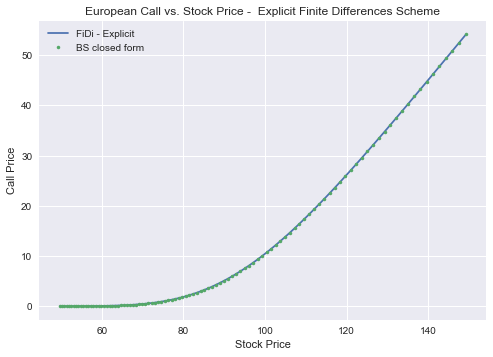

In [97]:
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt 
import seaborn

def eu_call_bs(S_t,r,sigma,T,K,t):
    d_1 = (np.log(S_t/K)+(r+sigma**2/2)*(T-t))/(sigma*(T-t)**0.5)
    d_2 = d_1 - sigma*(T-t)**0.5
    phi_1 = norm.cdf(d_1)
    cdf_d2 = norm.cdf(d_2)
    c = S_t * phi_1 - K*np.exp(-r*(T-t)) *cdf_d2
    phi_0 = -K*np.exp(-r*T)*cdf_d2

    return c, phi_0, phi_1

def BS_EuCall_FiDi_Explicit (r, sigma, a, b, m, nu_max, T, K):
    
    
    w = np.zeros(m + 1)
    
    # Time and space discretization step sizes
    delta_t = 0.5*sigma**2*T / nu_max
    delta_x = (b-a) / m
    
    # Check for stability of explicit scheme
    Lambda = delta_t / delta_x**2
    if Lambda >= 1/2:
        raise ValueError("Finite difference scheme unstable.")
    
    
    # Determine grid in time and space
    t_tilde = np.array(range(nu_max+1)) * delta_t
    x_tilde = a + np.array(range(m+1)) * delta_x
    
    # Compute auxiliary variables
    q = 2*r/sigma**2
    q_minus = 0.5 * (q-1)
    q_plus = 0.5 * (q+1)     
    # Boundary condition for t_tilde = 0, corresponding to payoff
    # of the option at maturity.
    w = np.maximum( np.exp(q_plus*x_tilde)-np.exp(q_minus*x_tilde), 0 )
              
    
    
    # Boundary condition for x = b. Stays the same for all time points
    w[0] = 0
    
    # Iterate through time layers.
    for nu in range(nu_max):
        
        w[1:-1] =  Lambda*(w[0:-2]) + (1-2*Lambda)*w[1:-1] + Lambda*(w[2:])
        # Boundary condition for x = b.
        w[-1] = np.exp(q_plus*b + q_plus**2*t_tilde[nu+1])-np.exp( q_minus*b + q_minus**2*t_tilde[nu+1] )
        
              
    # retransformation of heat equation
    V0 =( K * w * np.exp(-q_minus*x_tilde - 0.5* sigma**2*T*(q_minus**2 + q)))
    
    # vector of initial stock prices 
    S = K*np.exp(x_tilde)
    
    return V0, S


r = 0.05
sigma = 0.2
a = -0.7
b = 0.4
m = 100
nu_max = 2000
T = 1
K = 100
t=0





V0,S = BS_EuCall_FiDi_Explicit (r, sigma, a, b, m, nu_max, T, K)
plt.plot(S,V0,label='FiDi - Explicit')
plt.title("European Call vs. Stock Price -  Explicit Finite Differences Scheme")
plt.xlabel("Stock Price")
plt.ylabel("Call Price")



C, _,_ = eu_call_bs(S,r,sigma,T,K,t)
plt.plot(S,C,'.',label='BS closed form')
plt.legend()
plt.show()



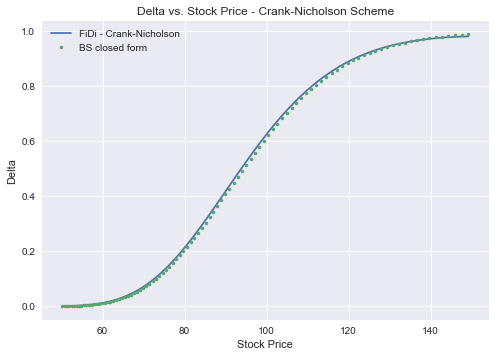

In [98]:
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt 
import seaborn

def eu_call_bs(S_t,r,sigma,T,K,t):
    d_1 = (np.log(S_t/K)+(r+sigma**2/2)*(T-t))/(sigma*(T-t)**0.5)
    d_2 = d_1 - sigma*(T-t)**0.5
    phi_1 = norm.cdf(d_1)
    cdf_d2 = norm.cdf(d_2)
    c = S_t * phi_1 - K*np.exp(-r*(T-t)) *cdf_d2
    phi_0 = -K*np.exp(-r*T)*cdf_d2

    return c, phi_0, phi_1

def BS_EuCall_FiDi_CrankNicholson(r, sigma, a, b, m, nu_max, T, K):
    
    
    w = np.zeros(m + 1)
    
    # Time and space discretization step sizes
    delta_t = 0.5*sigma**2*T / nu_max
    delta_x = (b-a) / m
    
    
    # Determine grid in time and space
    t_tilde = np.array(range(nu_max+1)) * delta_t
    x_tilde = a + np.array(range(m+1)) * delta_x
    

    
    # Compute auxiliary variables
    q = 2*r/sigma**2
    qminus = 0.5 * (q-1)
    qplus = 0.5 * (q+1)
    Lambda = delta_t / delta_x**2
    
    # tridiagonal matrix for the implicit scheme
    A_alpha = (1+Lambda)*np.ones(m-1)
    A_beta = -0.5*Lambda*np.ones(m-2)
    
    # defining the tridiagonal matrix A in the linear equation system Ax=b
    A = np.diag(np.ones(m-1)*(1+Lambda),0) + np.diag(np.ones(m-2)*-0.5*Lambda,-1) + np.diag(np.ones(m-2)*-0.5*Lambda,1)
            
    # Boundary condition for t_tilde = 0, corresponding to payoff
    # of the call option at maturity.
    w = np.maximum( np.exp(qplus*x_tilde) - np.exp(qminus*x_tilde), 0 )
        
    # Boundary condition for x = a.
    w[0] = 0
        
    # Boundary condition for x = b.
    w[-1] = np.exp( qplus*b + qplus**2*t_tilde[0] ) - np.exp(qminus*b + qminus**2*t_tilde[0])   
    
    # Iterate through time layers.
    for nu in range(nu_max):

        # Explicit part of Crank-Nicholson 
        w[1:-1] =  0.5*Lambda*w[:-2] + (1-Lambda)*w[1:-1] + 0.5*Lambda*w[2:]
        
        # Boundary condition for x = b.
        w[-1] = np.exp( qplus*b + qplus**2*t_tilde[nu+1] ) - np.exp(qminus*b + qminus**2*t_tilde[nu+1])
        
        # Modification for w_nu,m  and implicit part of Crank-Nicholson 
        w[-2] = w[-2] + 0.5*Lambda*w[-1]
        
        # Solving the linear equation system Ax=b for x
        w[1:-1] = np.linalg.solve(A, w[1:-1].transpose())
        
    # retransformation of heat equation
    V0 =( K * w * np.exp(-qminus*x_tilde - 0.5* sigma**2*T*(qminus**2 + q)))
   
    # vector of initial stock prices 
    S = K*np.exp(x_tilde)
    
    #phi_1(0) = derivative of V(0,S(0)) w.r.t. S(0), can be approximated by (V(0,S(0)+h)-V(0,S(0)))/h
    #here h = difference between two initial stock price values (usually h should be small, but it works okay )
    phi1 = np.diff(V0) / np.diff(S)
    return V0, S, phi1


r = 0.05
sigma = 0.2
a = -0.7
b = 0.4
m = 100
nu_max = 2000
T = 1
K = 100


V0, S, phi1 = BS_EuCall_FiDi_CrankNicholson(r, sigma, a, b, m, nu_max, T, K)


plt.plot(S[1:],phi1,label='FiDi - Crank-Nicholson')
plt.title("Delta vs. Stock Price - Crank-Nicholson Scheme")
plt.xlabel("Stock Price")
plt.ylabel("Delta")

_, _,phi1_cf= eu_call_bs(S,r,sigma,T,K,0)
plt.plot(S[1:],phi1_cf[:-1],'.',label='BS closed form')
plt.legend()


plt.show()




#### Valueing American puts by solving the Black Scholes PDE using finite differences

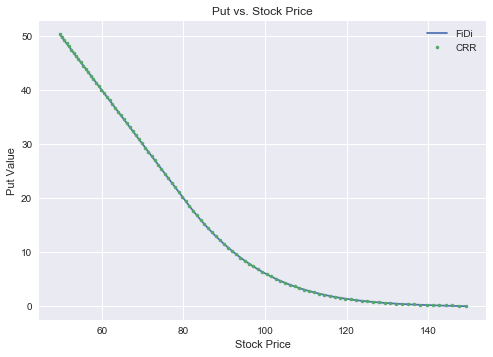

In [60]:
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt 
import seaborn

def brennon_schwartz(A_alpha, A_beta, A_gamma, b_solve, g_discr):
    
    
    n = len(A_alpha)
    x = np.zeros(A_alpha.shape)
    alpha_hat = np.zeros(A_alpha.shape)
    b_hat = np.zeros(b_solve.shape)
    
    # initial values of alpha_hat and b_hat
    alpha_hat[-1] = A_alpha[-1]
    b_hat[-1]= b_solve[-1]
    
    
    # backward recursion for values of alpha_hat and b_hat
    for i in range(n-2, -1, -1):
        alpha_hat[i] = A_alpha[i] - A_beta[i]*A_gamma[i+1]/alpha_hat[i+1]
        b_hat[i] = b_solve[i] - A_beta[i]*b_hat[i+1]/alpha_hat[i+1]
    
    
    # first value of output x
    x[0] = max(b_hat[0]/alpha_hat[0], g_discr[0])
    
    # forward recursion for values of output x
    for i in range(1,n):
        x[i] = np.maximum((b_hat[i]-A_gamma[i]*x[i-1])/alpha_hat[i],g_discr[i])
    
    return x 


def BS_AmPut_FiDi_CN (r, sigma, a, b, m, nu_max, T, K):
    
    
    w = np.zeros(m + 1)
    
    # Time and space discretization step sizes
    delta_t = 0.5*sigma**2*T / nu_max
    delta_x = (b-a) / m
    
    # Determine grid in time and space.
    t_tilde = np.array(range(nu_max+1)) * delta_t
    x_tilde = a + np.array(range(m+1)) * delta_x

    
    # Compute auxiliary variables.
    q = 2*r/sigma**2
    qminus = 0.5 * (q-1)
    qplus = 0.5 * (q+1)
    Lambda = delta_t / delta_x**2
    
    # Function for the transformed payoff of the american put
    def g(t_tilde, x_tilde):
        return np.exp(qplus**2*t_tilde)*np.maximum(np.exp(x_tilde*qminus)-np.exp(x_tilde*qplus),0)

    

    # tridiagonal matrix for the implicit scheme, used in the Brennon-Schwartz algorithm                
    A_alpha = (1+Lambda)*np.ones(m-1)
    
    A_beta = -0.5*Lambda*np.ones(m-1)
    A_beta[-1]= 0
    
    A_gamma = -0.5*Lambda*np.ones(m-1)
    A_gamma[0] = 0
    
            
    # Boundary condition for t_tilde = 0, corresponding to payoff of the call option at maturity.
    w = g(t_tilde[0], x_tilde)
    
    
    b_solve = np.zeros(m-1)
         
    
    # Iterate through time layers.
    
    for nu in range(nu_max):
        g_discr = g(t_tilde[nu],x_tilde)
        
        # Boundary condition for x = b.
        w[-1] = g_discr[-1]
        
        # boundary condition for x = a.
        w[0] = g_discr[0]
        
        # Creating the vector b 
        b_solve[1:-1] =  w[2:-2] + 0.5*Lambda*(w[1:-3] - 2*w[2:-2] + w[3:-1])

        
        # First and last value for b 
        b_solve[0] = w[1]+ 0.5*Lambda*(w[2] - 2*w[1] + g_discr[0] + g(t_tilde[nu+1],a))
        b_solve[-1] = w[-2] + 0.5*Lambda*(g_discr[-1] - 2*w[-2] + w[-3] + g(t_tilde[nu+1],b))       
        
        # Using the Brennon Schwartz algorithm 
        w[1:-1] =  brennon_schwartz(A_alpha, A_beta, A_gamma, b_solve, g_discr[1:-1])

    # retransformation of heat equation
    
    V0 =( K * w * np.exp(-qminus*x_tilde - 0.5* sigma**2*T*(qminus**2 + q)))
    
    # vector of initial stock prices 
    S = K*np.exp(x_tilde)
    
    return V0, S


def crr_bs_approx(S_0,r,sigma,T,M,K,EU,Type):
    
    dt=T/M
    #Set u,d,q such that first and second moments match BS
    beta = 0.5*(np.exp(-r*dt)+np.exp((r+(sigma**2))*dt))
    u = beta + ((beta**2)-1)**0.5
    d = 1/u#beta - ((beta**2)-1)**0.5
    q = (np.exp(r*dt)-d)/(u-d)

    if Type == 'call':
        def g(St,K):
            return max(St - K, 0)
    elif Type == 'put':
        def g(St,K):
            return max(K - St, 0)
    else:
        raise Exception("Specify valid Type ('put'/'call')") 

    g = np.vectorize(g ,otypes=[np.float])        

    S = np.zeros((M+1,M+1))
    S[0,0] = S_0
    V = np.zeros((M+1,M+1))
    for i in range(1,M+1):
        for j in range(i+1):
            S[j,i] = S_0*(u**j)*(d**(i-j))

    V[:,-1] = g(S[:,-1],K)

    if EU == 1:
        for i in range(M-1,-1,-1):
            for j in range(i+1):
                V[j,i] = np.exp(-r*dt)*( q*V[j+1,i+1] + (1-q)*V[j,i+1])
    elif EU == 0:
        for i in range(M-1,-1,-1):
            for j in range(i+1):
                V[j,i] = max(g(S[j,i],K) ,np.exp(-r*dt)*( q*V[j+1,i+1] + (1-q)*V[j,i+1]))
    else:
        raise Exception("Specify valid EU state (0/1)") 
    
    
    return V[0,0]



r = 0.05
sigma = 0.2
a = -0.7
b = 0.4
m = 100
nu_max = 2000
T = 1
K = 100



V0,S = BS_AmPut_FiDi_CN (r, sigma, a, b, m, nu_max, T, K)

plt.plot(S,V0,label='FiDi')
plt.title("Put vs. Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Put Value")

V0_crr = np.zeros(S.shape)
for i in range(len(S)):
    V0_crr[i] = crr_bs_approx(S[i],r,sigma,T,200,K,0,'put')
plt.plot(S,V0_crr,'.', label='CRR')
plt.legend()
plt.show()

#### Hedging Error

Since the option price depends on $\sigma$, which is not known and must be estimated, an interesting question to ask is what happens if one puts in a 'wrong' $\sigma^*$.

Consider the delta hedged portfolio

$$\Pi_t =  V_t - \Delta_t S_t - \frac{(V_t - \Delta_t S_t)}{B_t} B_t $$

$$d\Pi_t =  dV_t - \Delta_t dS_t - (V_t - \Delta_t S_t) r dt $$ 
$\tag{1}$

By Ito's lemma

$$\begin{align}
dV_t &= \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial t} dS_t + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} d[S_t,S_t]  \\
&= \theta_t dt + \Delta_t dS_t + \frac{1}{2}\Gamma_t d[S_t,S_t] 
\end{align}$$ 
$ \tag{2}$

Plugging (2) into (1) yields (3)

$$ d\Pi_t = (\theta_t + rS_t \Delta_t - rV_t)dt - \frac{1}{2}\Gamma d[S_t,S_t]   $$
$\tag{3}$

In the Black-Scholes model 

$$\begin{align}
\theta_t + r S_t \Delta_t + \frac{1}{2} \Gamma S_t^2 \sigma^2 - r V_t = 0 \\
\theta_t + r S_t \Delta_t  - r V_t = - \frac{1}{2} \Gamma S_t^2 \sigma^2
\end{align} $$

$\tag{4}$

Plugging (4) into (3)

$$\begin{align}
d\Pi_t &= - \frac{1}{2} \Gamma S_t^2 \sigma^2 dt - \frac{1}{2}\Gamma d[S_t,S_t]  \\
       &= \frac{1}{2} \Gamma S_t^2 \left(  \frac{d[S_t,S_t]}{(S_t)^2 dt} - \sigma^2\right) dt \\
       &= \frac{1}{2} \Gamma S_t^2 \left( \sigma^{2*}  - \sigma^2 \right) dt
\end{align}$$
 
Where the last equality follows from the fact that the quadratic variation of geometric Brownian motion $ d[S_t,S_t] = \sigma^{2*} S_t^2 dt$

The total $PnL_t$ due to the wrong $\sigma^{*}$ is given by the integral 

$$PnL_t = \int_0^T e^{-r(T-t)} \frac{1}{2} \Gamma S_t^2 \left( \sigma^{2*}  - \sigma^2 \right) dt$$ 

## Options pricing via Laplace Transform

Often the probability density function of the stock price are not known but characteristic functions are available instead. In these cases we can use Laplace transforms to price options. 
We consider a model with bond and stock of the form

$$\begin{align}
B(t) = e^{rt} \\
S(t) = e^{X(t)}
\end{align} $$ 

If the payoff of the claim under consideration is of the form $f(X(T))$, the initial fair option price equals


$$\begin{align}
V(t) = B(0) \mathbb{E}^\mathbb{Q}\big[[f(X(T))/B(T)\big] \\
= e^{-rT}\mathbb{E}^\mathbb{Q}\big[[f(X(T))\big]
\end{align} $$ 

For very simple payoffs, the expectation can be calculated explicitly in many models, namely for $f(x) = e^{zx} $ with some constant $z$.
For more complicated ones we consider payoffs of the form

$$ f(x)=e^{zx} =e^{\Re(z)x(cos(\Im(z)x)+ i sin(\Im(z)x))}$$

where $z \in \mathbb{C}$ and $i = \sqrt{-1} $.

The corresponding option price equals

$$V(0) = e^{-rT} \mathbb{E}^\mathbb{Q}(e^{zX(T))}) = e^{-rT} \chi(-i z)$$

with  $\chi(u) = \mathbb{E}^\mathbb{Q}(e^{i u X(T)})$.

$\chi(u)$ is called (extended) characteristic function of $ X (T )$ in $u$ and it is known in closed form for many processes $X$. 

The key idea is to write an arbitrary, more complicated payoff (e.g. a European call) in the form

$$ f(x) = \int \rho(z) e^{xz} dz$$

with some function $\rho(z)$. Such a representation can be viewed as a generalized linear combination of “simple” payoffs $e^{zx}$.

In [47]:
import math 
from scipy.integrate import quad
import numpy as np

def bs_eu_call(S0, r, sigma, T, K, R):
    # Laplace transform of f(x) = (e^x - K)^+
    def f_tilde(z):
        return  K**(1-z) / (z*(z-1))
    # Characteristic function of log(S(T)) in the Black-Scholes model
    def chi(u):
        return  np.exp( 1j*u*(np.log(S0)+r*T) - (1j*u+u**2)*sigma**2/2*T )
    # Integrand for the Laplace transform method
    def integrand(u):
        return np.exp(-r*T)/math.pi * ( f_tilde(R+1j*u)*chi(u-1j*R) ).real
    # option price
    V0 , err = quad(integrand, 0, 50)
    
    return V0


S0 = 100
r = 0.03
sigma = 0.3
T = 1
K = 100
R = 1.1
V0_BS = bs_eu_call(S0, r, sigma, T, K, R)

print(f"Option price via Laplace Transform in BS framework: {round(V0_BS,3)}")




        

Option price via Laplace Transform in BS framework: 13.283


In [70]:
import math 
from scipy.integrate import quad
import numpy as np

def heston_eu_call_hedge_laplace(St, r, nut, kappa, Lambda, sigma_tilde, t, T, K, K_tilde, R, R_tilde):
    
    # Laplace transform of the function f(x) = (e^x - K)^+,
    def f_tilde_K(z):
        return K**(1-z) / (z*(z-1))
    
    
    # Laplace transform of the function f(x) = (e^x - K_tilde)^+,
    def f_tilde_K_tilde(z):
        return K_tilde**(1-z) / (z*(z-1))
    
    
    # Characteristic function of log(S(T)) at timepoint t in the Heston model,
    
    def chi (u):
        d = np.sqrt(Lambda**2+sigma_tilde**2*(1j*u+u**2))
        n = math.cosh(d*(T-t)/2) + Lambda*math.sinh(d*(T-t)/2)/d
        z1 = np.exp(Lambda*(T-t)/2)
        z2 = (1j*u+u**2)*math.sinh(d*(T-t)/2)/d
        return np.exp( 1j*u*(np.log(St)+r*(T-t))) * (z1/n)**(2*kappa/sigma_tilde**2) * np.exp(-nut*z2/n)
    
    
    # derivative of Characteristic function of log(S(T)) w.r.t. S(t)
    def delx_chi(u):
        return 1j*u/St * chi(u)
    
    
    # derivative of Characteristic function of log(S(T)) w.r.t. gamma(t)
    def delnu_chi(u):
        d = np.sqrt(Lambda**2+sigma_tilde**2*(1j*u+u**2))
        n = math.cosh(d*(T-t)/2) + Lambda*math.sinh(d*(T-t)/2)/d
        z2 = (1j*u+u**2)*math.sinh(d*(T-t)/2)/d
        return -z2/n * chi(u);
        
       
        
    # general Integrand for the Laplace transform method, arguments are (besides "u")
    # the laplace transform we want to use (for different calls or puts) and characteristic funtion or derivative
    def laplace_integrand (u, f_tilde, del_func):
        return np.exp(-r*T)/math.pi * ( f_tilde(R+1j*u)*del_func(u-1j*R) ).real
    
    
    # price of the option and liquidly traded Call 
    Vt, _ = quad(laplace_integrand, 0, 50 ,args=(f_tilde_K_tilde,chi))
    Ct, _ = quad(laplace_integrand, 0, 50 , args=(f_tilde_K, chi)) 
    
    # derivates of the option price and liquidly traded Call with respect to the variance process (gamma_t)
    del3v,_ = quad(laplace_integrand, 0, 50 ,args=(f_tilde_K_tilde, delnu_chi))
    del3c,_ = quad(laplace_integrand, 0, 50 ,args=(f_tilde_K, delnu_chi))
    
    # derivates of the option price and liquidly traded Call with respect to S_t
    del2v, _ = quad(laplace_integrand, 0, 50, args=(f_tilde_K_tilde, delx_chi))
    del2c, _ = quad(laplace_integrand, 0, 50, args=(f_tilde_K, delx_chi))
    
    # hedge 
    phi2 = del3v/del3c
    phi1 = del2v - phi2*del2c
    phi0 = (Vt - phi1*St - phi2*Ct)*np.exp(-r*t)
    
    return Vt, phi0, phi1, phi2

St = 100
r = 0.03
nut = 0.3**2
kappa = 0.3**2
Lambda = 2.5
sigma_tilde = 0.2
T = 1
K = 95
K_tilde = 100
R = 1.1
R_tilde = 1.1
t=0


Vt, phi0, phi1, phi2 = heston_eu_call_hedge_laplace(St, r, nut, kappa, Lambda, sigma_tilde, t, T, K, K_tilde, R, R_tilde)
print(f" Option Price: {Vt} \n   Hedge Position Call: {phi2} \n   Hedge Position Stock: {phi1} \n   Hedge Position Bond: \
{phi0} \n")
                    

 Option Price: 9.755867884013995 
   Hedge Position Call: 1.0634215306663264 
   Hedge Position Stock: -0.12638679472545133 
   Hedge Position Bond: 9.309745759697751 



/Users/jan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


100 loops, best of 3: 17 ms per loop


,Strike_Price,Option_Price
0,80,24.606408
1,81,23.766824
2,82,22.937541
3,83,22.118311
4,84,21.308892
5,85,20.509052
6,86,19.718568
7,87,18.937222
8,88,18.164805
9,89,17.468357


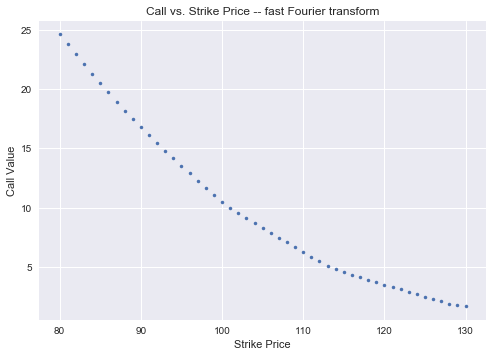

In [99]:
from IPython.display import display
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn

def BS_EuCall_FFT(S0, r, sigma, T, K, R, N, M):
    '''
    The fast Fourier transform method allows us to compute option prices for many strikes in an efficient manner.
    '''
    Delta=M/N
    kappa_1=np.log(S0)-(N/2)*2*np.pi/M
    kappa=kappa_1+np.array(range(N))*2*np.pi/M
    
    
    def g(u):
        # Laplace transform of the function f_0(x) = (e^x - e^0)^+,
        
        def f_tilde_0(z):
            return  1 / (z*(z-1))


        # Characteristic function of log(S(T)) in the Black-Scholes model,
        def chi (u):
            return  np.exp( 1j*u*(np.log(S0)+r*T) - (1j*u+u**2)*sigma**2/2*T )

       
        y=np.ones(len(u),dtype=complex)# Important: You need to tell numpy the dtype=complex
        for i in range(len(u)):
            y[i]=f_tilde_0(R+1j*u[i])*chi(u[i]-1j*R)
        return y
        print(y)
    
    x=g((np.array(range(1,N+1))-0.5)*Delta)*Delta*np.exp(-1j*(np.array(range(N)))*Delta*kappa_1)

    #Computing the discrete fourier transform of x
    x_hat=np.fft.fft(x)
    
    #Computing the prices of options with values in kappa
    V_kappa=1/np.pi*np.exp(-r*T+(1-R)*kappa)*((x_hat*np.exp(-1j/2*Delta*kappa)).real)

    #Computing the prices of option with value in K using linear interpolation in log-strikes
    V0=np.interp(np.log(K),kappa, V_kappa )
   
    return V0



S0 = 100
r = 0.05
sigma = 0.2
T = 1
K = np.array(range(80,131))
R = 1.1
N = 2**11
M = 50

#time the function 
%timeit V=BS_EuCall_FFT(S0, r, sigma, T, K, R, N, M)

option_prices = pd.DataFrame()
option_prices['Strike_Price'] = K
option_prices['Option_Price'] = V
display(option_prices)
plt.plot(K,V, '.')
plt.title("Call vs. Strike Price -- fast Fourier transform")
plt.xlabel("Strike Price")
plt.ylabel("Call Value")
plt.show()